# Part 1: Exploratory Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

In [2]:
data = pd.read_csv("data/california_housing.csv")
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0


In [3]:
data.isnull().sum()

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
price_above_median    0
dtype: int64

## Shape, Size, and Datatype Conversion

In [4]:
print("Shape: ", data.shape)
print("Size: ", data.size)
print("Dtypes: ")
data.info()

Shape:  (20634, 9)
Size:  185706
Dtypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


## Checking for Duplicate Rows and Treatment

In [5]:
data.duplicated().sum()

0

In [6]:
print("MedInc", data['MedInc'].unique())
print("HouseAge", data['HouseAge'].unique())
print("AveRooms", data['AveRooms'].unique())
print("AveBedrms", data['AveBedrms'].unique())
print("Population", data['Population'].unique())
print("AveOccup", data['AveOccup'].unique())
# print("Latitude", data['Latitude'].unique())
# print("Longitude", data['Longitude'].unique())
print("price_above_median", data['price_above_median'].unique())

MedInc [2.1827 3.0755 1.8235 ... 1.7311 4.3487 5.679 ]
HouseAge [26. 32. 40. 37. 13. 49. 34. 39. 35. 22. 24. 19. 27. 25. 10. 43. 21.  3.
 36.  6. 23. 38. 50. 52. 48. 15. 42. 47. 12. 29. 44. 11. 31. 20.  7. 17.
 45. 18. 14. 28. 16. 41. 30. 33.  4. 46.  5.  8.  9. 51.  2.  1.]
AveRooms [4.52142857 4.62306778 4.70114943 ... 5.78947368 5.27522936 5.25373134]
AveBedrms [0.92142857 0.98335315 1.12643678 ... 1.02999434 1.01364629 1.01171459]
Population [ 305. 3868.  928. ... 7984. 3717. 6330.]
AveOccup [2.17857143 4.59928656 3.55555556 ... 2.34185304 3.52838428 3.93859649]
price_above_median [0 1]


You can see that there are no null values, thus no pre processing has to be done here.
All values are numerical, not object, so all values are not 'weird' and don't need encoding or conversion to categorical data

## Statistical Information

In [7]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
count,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000
mean,3.870795,28.640399,5.429171,1.096628,1425.398081,3.070449,35.631722,-119.569594,0.500000
std,1.899796,12.584629,2.474393,0.473929,1132.137403,10.387501,2.135738,2.003457,0.500012
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.000000
25%,2.563925,18.000000,4.440930,1.006067,787.000000,2.429649,33.930000,-121.800000,0.000000
50%,3.534950,29.000000,5.229190,1.048780,1166.000000,2.817937,34.260000,-118.490000,0.500000
75%,4.743550,37.000000,6.052381,1.099499,1725.000000,3.282249,37.710000,-118.010000,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000


## Removing Extreme Values

In [8]:
# Define columns with potential outliers
columns_to_check = ["AveRooms", "AveBedrms", "AveOccup", "Population"]

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[columns_to_check].quantile(0.25)
Q3 = data[columns_to_check].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define acceptable lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where values are outside the bounds
data_cleaned = data[~((data[columns_to_check] < lower_bound) | (data[columns_to_check] > upper_bound)).any(axis=1)]

data = data_cleaned

In [9]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
count,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000
mean,3.888485,29.636343,5.235604,1.046998,1260.275798,2.843508,35.647039,-119.631278,0.520869
std,1.798242,12.291581,1.112571,0.066638,625.625470,0.625189,2.124695,1.993183,0.499579
min,0.536000,1.000000,2.032738,0.866013,5.000000,1.161290,32.540000,-124.350000,0.000000
25%,2.607500,19.000000,4.457227,1.002423,805.000000,2.420819,33.940000,-121.840000,0.000000
50%,3.590000,30.000000,5.191320,1.043316,1150.000000,2.795691,34.270000,-118.560000,1.000000
75%,4.794100,38.000000,5.950000,1.088406,1619.000000,3.219976,37.720000,-118.040000,1.000000
max,15.000100,52.000000,8.467890,1.239521,3132.000000,4.560748,41.950000,-114.570000,1.000000


## Visualization thru Univariate Analysis

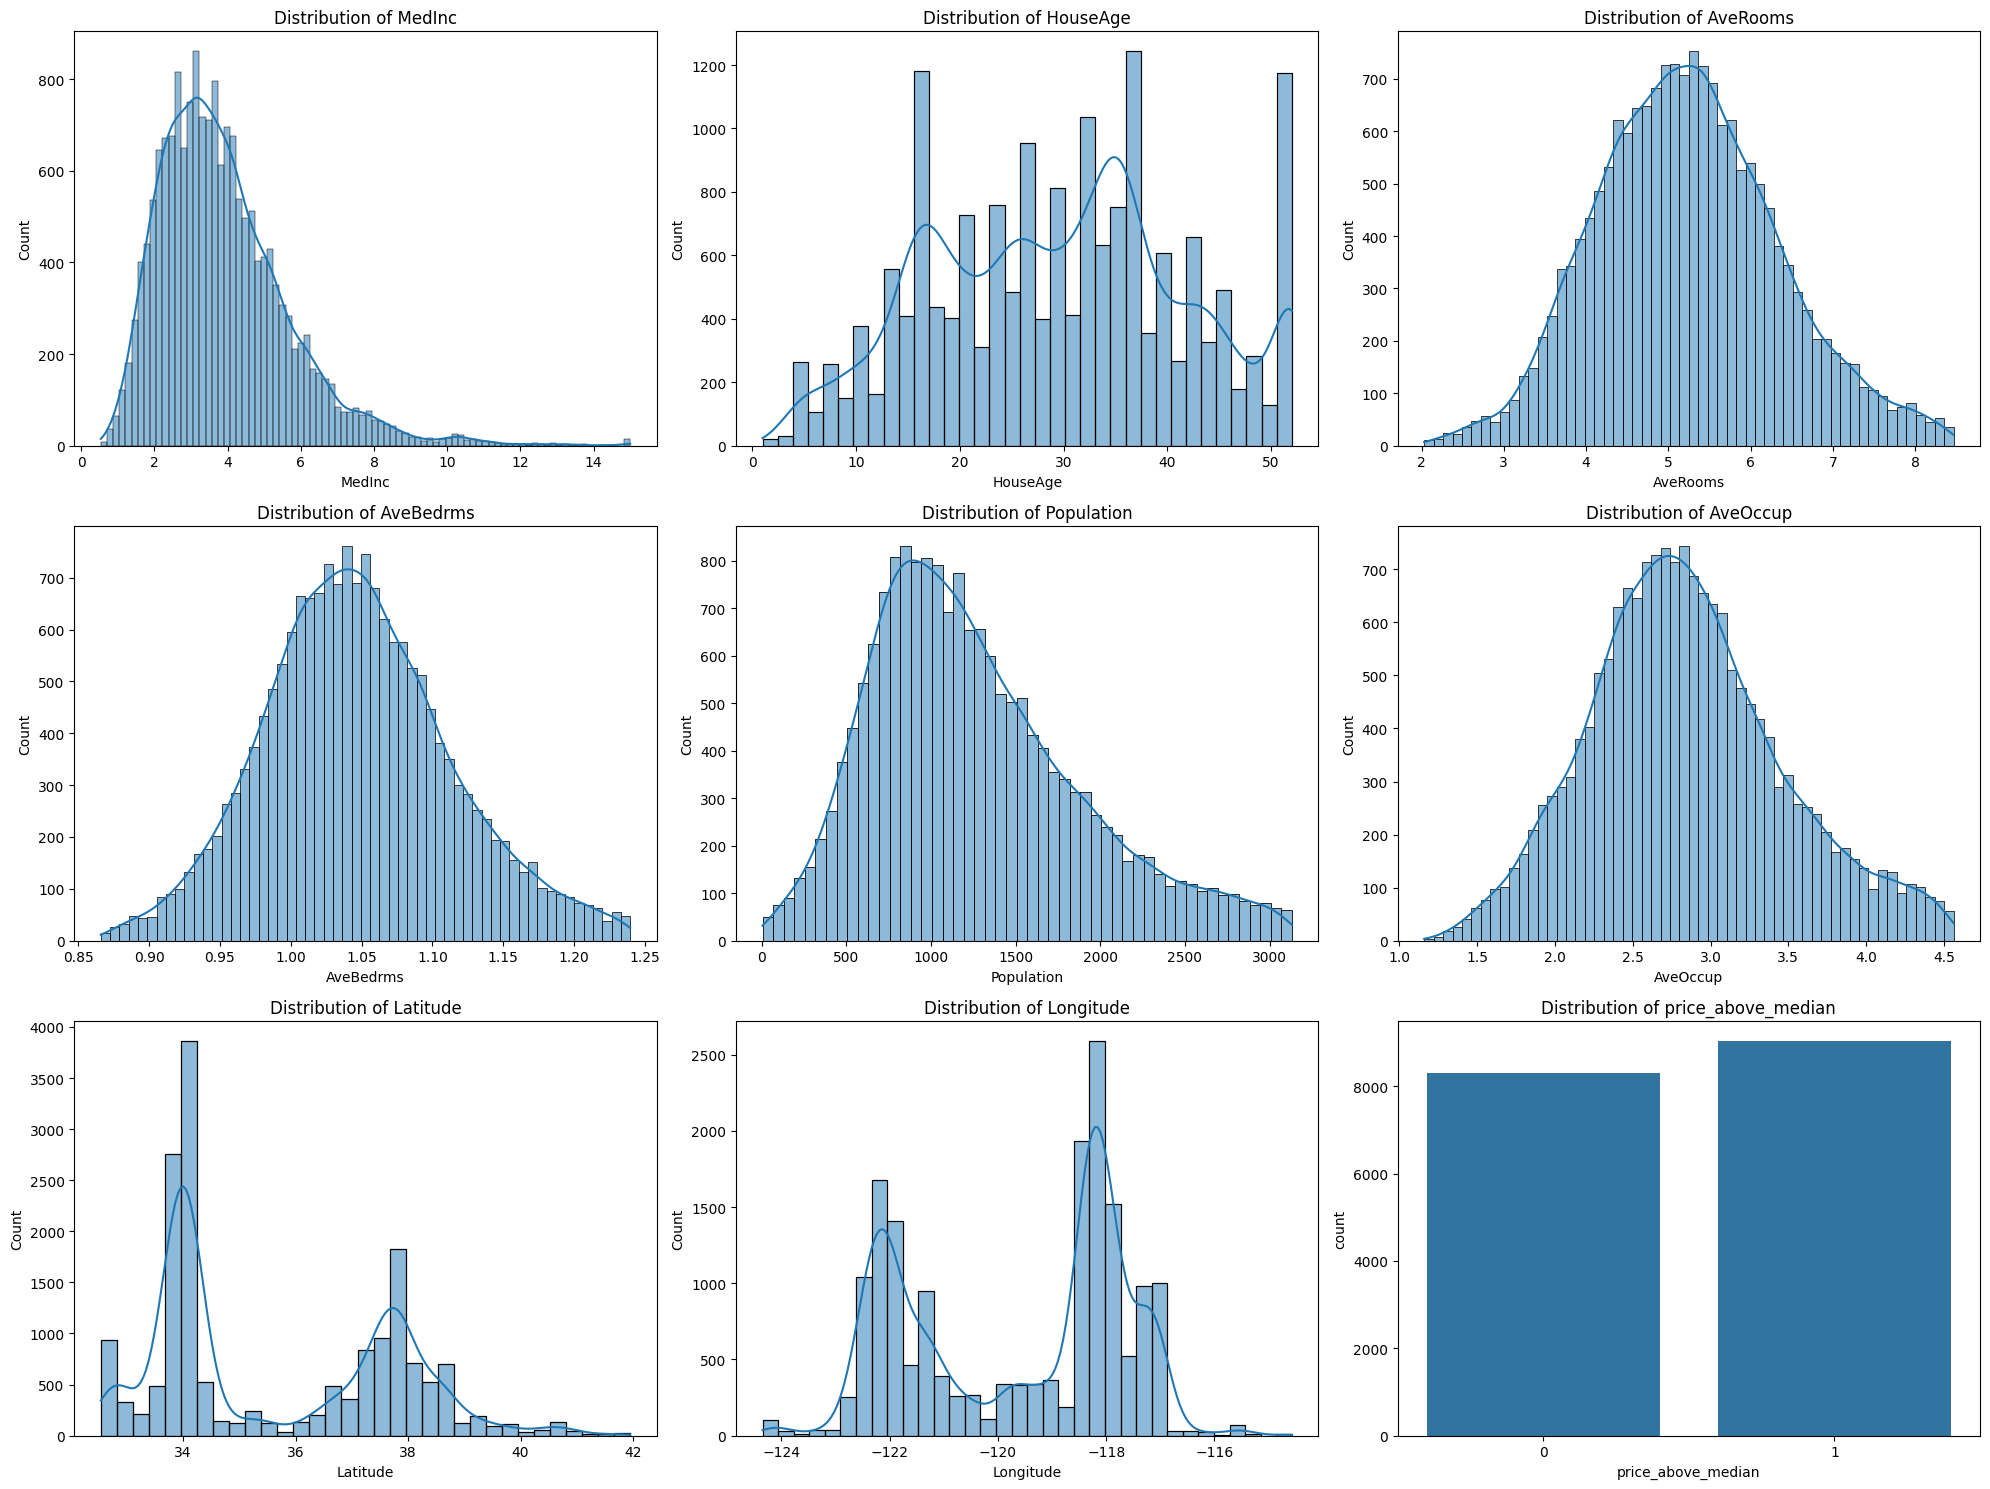

In [10]:
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'price_above_median']

plt.figure(figsize=(20, 15))
for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    if data[col].dtype == 'float64':
        sns.histplot(data[col], kde=True)
    else:
        sns.countplot(x=data[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Lots of sparse data is seen in some of the columns

# Part 2: Classification Techniques

## K - Nearest Neighbor

In [11]:
X = data.drop('price_above_median', axis=1)
y = data['price_above_median']

# library to split data
from sklearn.model_selection import train_test_split

# splitting data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=1)

X_train.shape

(12142, 8)

In [12]:
X_test.shape

(5204, 8)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate with k value of 3
knn = KNeighborsClassifier(n_neighbors=3)

# fit
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
accuracy_test=accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

Accuracy of knn on test data is : 0.63
Accuracy of knn on train data is : 0.81


In [15]:
class_report_test_KNN = classification_report(y_test, knn.predict(X_test))
class_report_train_KNN = classification_report(y_train, knn.predict(X_train))
print("Classification Report KNN n=3 on TEST:")
print(f"{class_report_test_KNN}")
print("Classification Report KNN n=3 Perceptron on TRAIN:")
print(f"{class_report_train_KNN}")

Classification Report KNN n=3 on TEST:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2493
           1       0.64      0.64      0.64      2711

    accuracy                           0.63      5204
   macro avg       0.62      0.62      0.62      5204
weighted avg       0.63      0.63      0.63      5204

Classification Report KNN n=3 Perceptron on TRAIN:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      5818
           1       0.82      0.82      0.82      6324

    accuracy                           0.81     12142
   macro avg       0.81      0.81      0.81     12142
weighted avg       0.81      0.81      0.81     12142



### Trying KNN with Grid Search

In [16]:
# Instantiate KNN classifier and param grid
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,100)}

In [17]:
# Perform Grid Search

from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [18]:
knn_gscv.best_params_

{'n_neighbors': 3}

In [43]:
best_knn = knn_gscv.best_estimator_
class_report_test_best_KNN = classification_report(y_test, best_knn.predict(X_test))
class_report_train_best_KNN = classification_report(y_train, best_knn.predict(X_train))
print("Classification Report best_KNN n=3 on TEST:")
print(f"{class_report_test_best_KNN}")
print("Classification Report best_KNN n=3 on TRAIN:")
print(f"{class_report_train_best_KNN}")

Classification Report best_KNN n=3 on TEST:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2493
           1       0.64      0.64      0.64      2711

    accuracy                           0.63      5204
   macro avg       0.62      0.62      0.62      5204
weighted avg       0.63      0.63      0.63      5204

Classification Report best_KNN n=3 on TRAIN:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      5818
           1       0.82      0.82      0.82      6324

    accuracy                           0.81     12142
   macro avg       0.81      0.81      0.81     12142
weighted avg       0.81      0.81      0.81     12142



Grid search with KNN overfits to the train data

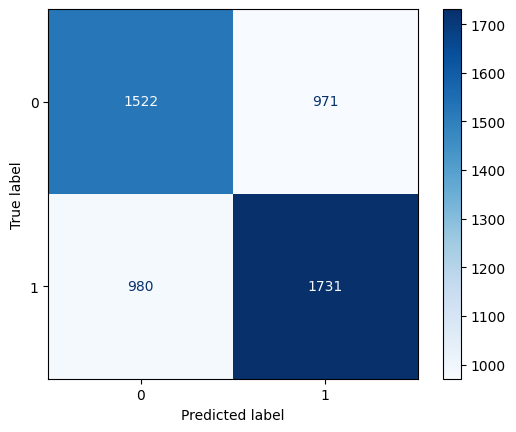

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

## Decision Tree Classifier

In [21]:
# instantiate and fit
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [22]:
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model_DT.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model_DT.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2493
           1       0.84      0.84      0.84      2711

    accuracy                           0.83      5204
   macro avg       0.83      0.83      0.83      5204
weighted avg       0.83      0.83      0.83      5204

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5818
           1       1.00      1.00      1.00      6324

    accuracy                           1.00     12142
   macro avg       1.00      1.00      1.00     12142
weighted avg       1.00      1.00      1.00     12142



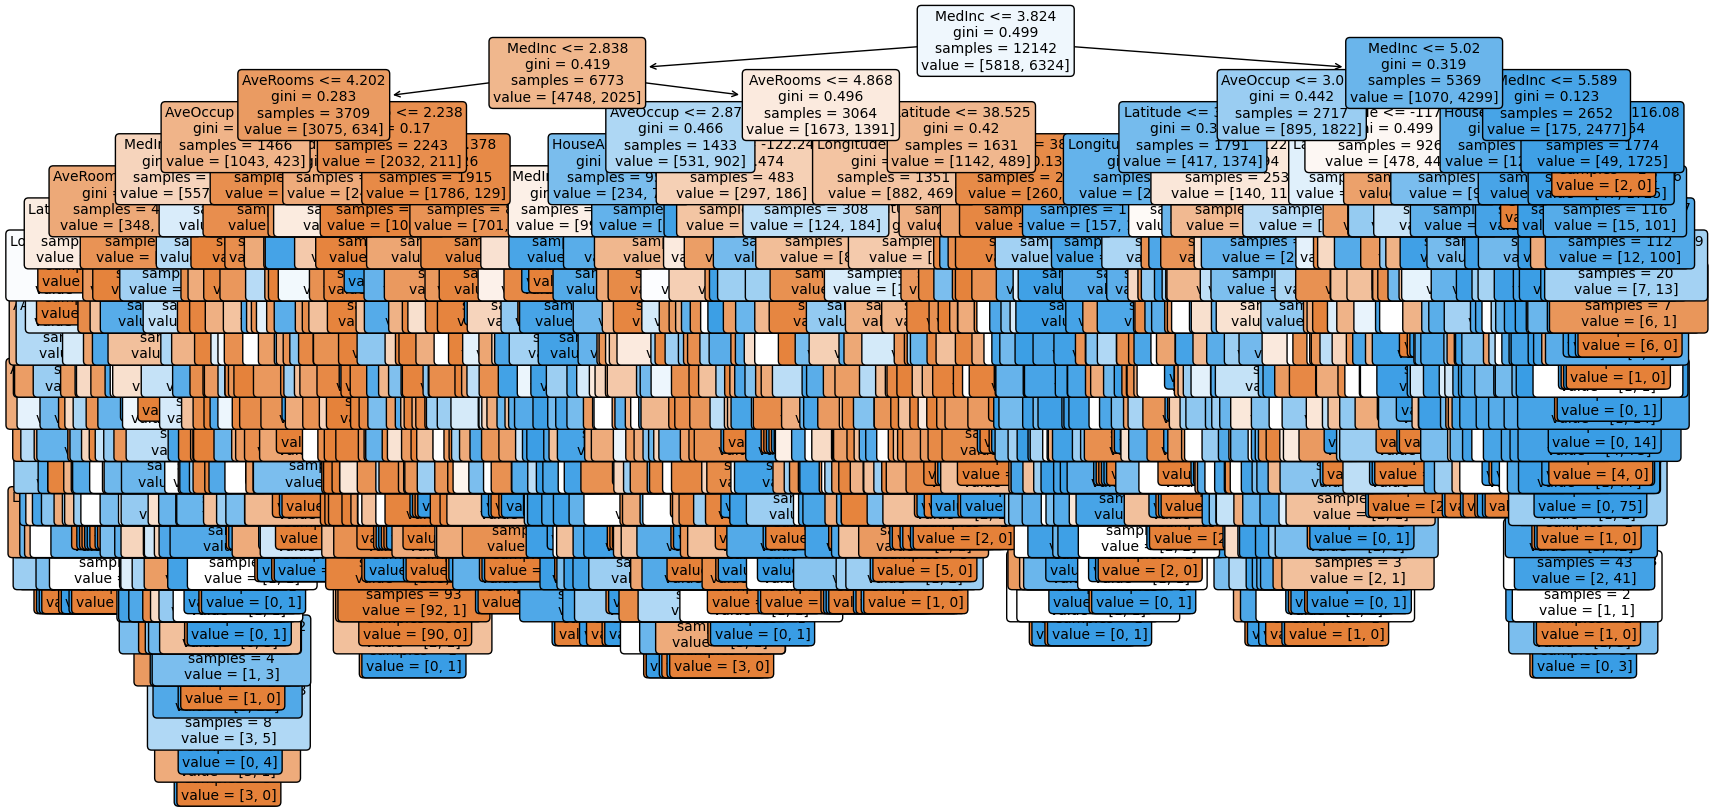

In [23]:
## TREE IS OVERFITTING TO TRAIN DATA
from sklearn import tree
plt.figure(figsize=(20, 10))  # Set the figure size to make it readable
tree.plot_tree(model_DT, 
                feature_names=X.columns,   # If you have feature names
                filled=True,    # Color the nodes based on the class
                rounded=True,   # Make the boxes rounded
                fontsize=10)    # Set the font size
plt.show()

The tree overfits to the training data, as seen with a huge and complex tree

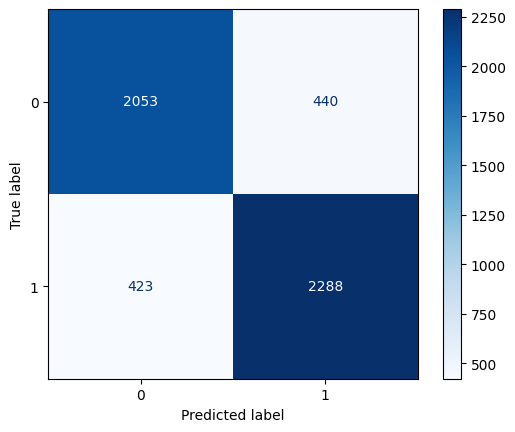

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(model_DT, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_RF = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=50, step=5),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}],
}

gscv = GridSearchCV(model_RF, param_grid, cv=5, n_jobs=8, scoring="recall", )
gscv.fit(X_train, y_train)
gscv.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 15}

In [26]:
model_RF = gscv.best_estimator_
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model_RF.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model_RF.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.99      0.07      0.12      2493
           1       0.54      1.00      0.70      2711

    accuracy                           0.55      5204
   macro avg       0.77      0.53      0.41      5204
weighted avg       0.76      0.55      0.42      5204

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       1.00      0.07      0.13      5818
           1       0.54      1.00      0.70      6324

    accuracy                           0.55     12142
   macro avg       0.77      0.53      0.41     12142
weighted avg       0.76      0.55      0.43     12142



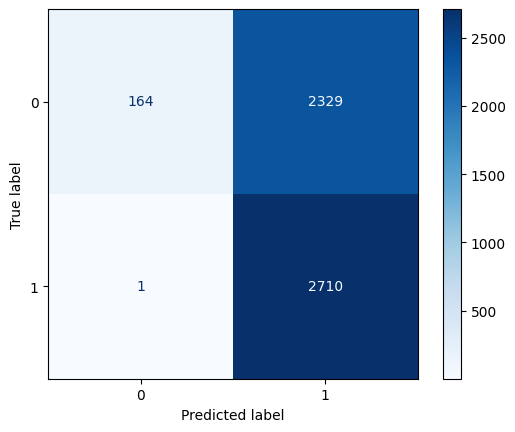

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(model_RF, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

## Adaboost Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier

decision_tree_stump = DecisionTreeClassifier(max_depth=1)

param_grid = {
   'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
   'n_estimators': [50, 100, 200, 300, 400],
   'algorithm': ['SAMME', 'SAMME.R']
}

abc = AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)
grid_search_abc = GridSearchCV(abc, param_grid, cv=3, n_jobs=8)
grid_search_abc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=8,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [50, 100, 200, 300, 400]})

In [29]:
test_report = classification_report(y_test, grid_search_abc.predict(X_test))
train_report = classification_report(y_train, grid_search_abc.predict(X_train))
print(f"Performance on TEST\n*******************\n{test_report}")
print(f"Performance on TRAIN\n********************\n{train_report}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2493
           1       0.89      0.89      0.89      2711

    accuracy                           0.89      5204
   macro avg       0.89      0.89      0.89      5204
weighted avg       0.89      0.89      0.89      5204

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5818
           1       0.89      0.90      0.90      6324

    accuracy                           0.89     12142
   macro avg       0.89      0.89      0.89     12142
weighted avg       0.89      0.89      0.89     12142



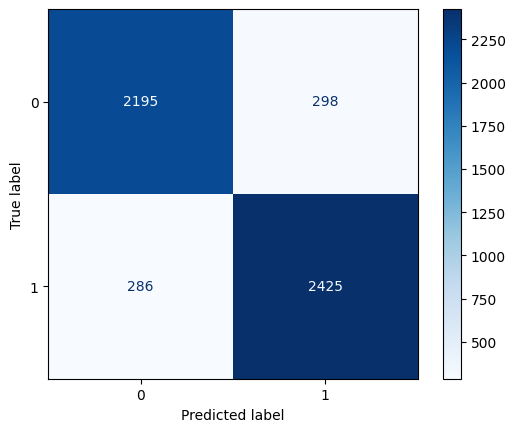

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(grid_search_abc, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

## Attempting Histogram-based Gradient Boosting

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier

# HGBoost with grid search ---
param_grid = {
   'learning_rate': [0.01, 0.1, 0.2],
   'max_depth': [3, 5, 7],
   'l2_regularization': [0, 0.1, 1]
}

hgb = HistGradientBoostingClassifier(random_state=42)
grid_search_hgb = GridSearchCV(hgb, param_grid, n_jobs=8, cv=3)
grid_search_hgb.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=8,
             param_grid={'l2_regularization': [0, 0.1, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7]})

In [32]:
test_report = classification_report(y_test, grid_search_hgb.predict(X_test))
train_report = classification_report(y_train, grid_search_hgb.predict(X_train))
print(f"Performance on TEST\n*******************\n{test_report}")
print(f"Performance on TRAIN\n********************\n{train_report}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2493
           1       0.91      0.91      0.91      2711

    accuracy                           0.91      5204
   macro avg       0.91      0.91      0.91      5204
weighted avg       0.91      0.91      0.91      5204

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5818
           1       0.96      0.97      0.97      6324

    accuracy                           0.96     12142
   macro avg       0.96      0.96      0.96     12142
weighted avg       0.96      0.96      0.96     12142



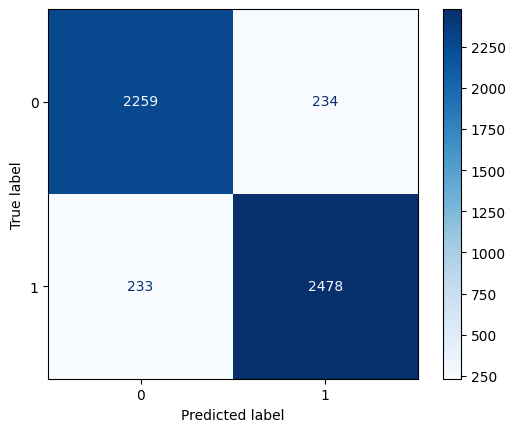

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(grid_search_hgb, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

## Adaboost with Data Standardization and Pipelining

### Trying with Standard Scaler first

In [34]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

param_grid_abc = {
   'abc__learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
   'abc__n_estimators': [50, 100, 200, 300, 400],
   'abc__algorithm': ['SAMME', 'SAMME.R']
}

p = pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('abc', AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)),
])

search_abc = GridSearchCV(p, param_grid_abc, n_jobs=8)
search_abc.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('abc',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                           random_state=42))]),
             n_jobs=8,
             param_grid={'abc__algorithm': ['SAMME', 'SAMME.R'],
                         'abc__learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
                         'abc__n_estimators': [50, 100, 200, 300, 400]})

In [35]:
test_report = classification_report(y_test, search_abc.predict(X_test))
train_report = classification_report(y_train, search_abc.predict(X_train))
print(f"Performance on TEST\n*******************\n{test_report}")
print(f"Performance on TRAIN\n********************\n{train_report}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2493
           1       0.90      0.90      0.90      2711

    accuracy                           0.89      5204
   macro avg       0.89      0.89      0.89      5204
weighted avg       0.89      0.89      0.89      5204

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5818
           1       0.90      0.91      0.90      6324

    accuracy                           0.90     12142
   macro avg       0.90      0.90      0.90     12142
weighted avg       0.90      0.90      0.90     12142



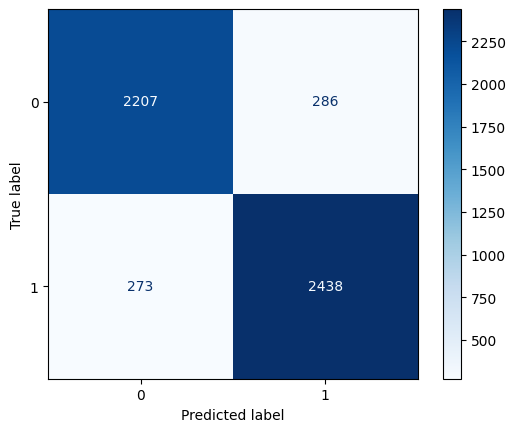

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(search_abc, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

## Attemping with MaxAbsScaler for Sparse Data

In [37]:
from sklearn.preprocessing import MaxAbsScaler

param_grid_abc = {
   'abc__learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
   'abc__n_estimators': [50, 100, 200, 300, 400],
   'abc__algorithm': ['SAMME', 'SAMME.R']
}

p = pipeline = Pipeline([
    ('scale', MaxAbsScaler()),
    ('abc', AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)),
])

search_abc_maxabs = GridSearchCV(p, param_grid_abc, n_jobs=8, cv=5)
search_abc_maxabs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MaxAbsScaler()),
                                       ('abc',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                           random_state=42))]),
             n_jobs=8,
             param_grid={'abc__algorithm': ['SAMME', 'SAMME.R'],
                         'abc__learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
                         'abc__n_estimators': [50, 100, 200, 300, 400]})

In [38]:
test_report = classification_report(y_test, search_abc_maxabs.predict(X_test))
train_report = classification_report(y_train, search_abc_maxabs.predict(X_train))
print(f"Performance on TEST\n*******************\n{test_report}")
print(f"Performance on TRAIN\n********************\n{train_report}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2493
           1       0.90      0.90      0.90      2711

    accuracy                           0.89      5204
   macro avg       0.89      0.89      0.89      5204
weighted avg       0.89      0.89      0.89      5204

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5818
           1       0.90      0.91      0.90      6324

    accuracy                           0.90     12142
   macro avg       0.90      0.90      0.90     12142
weighted avg       0.90      0.90      0.90     12142



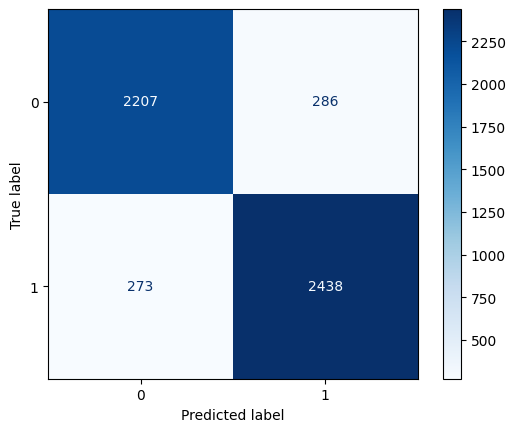

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(search_abc_maxabs, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

## Attempting RobustScaler

In [40]:
from sklearn.preprocessing import RobustScaler

param_grid_abc = {
   'abc__learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
   'abc__n_estimators': [50, 100, 200, 300, 400],
   'abc__algorithm': ['SAMME', 'SAMME.R']
}

p = pipeline = Pipeline([
    ('scale', RobustScaler()),
    ('abc', AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)),
])

search_abc_robust = GridSearchCV(p, param_grid_abc, n_jobs=8)
search_abc_robust.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', RobustScaler()),
                                       ('abc',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                           random_state=42))]),
             n_jobs=8,
             param_grid={'abc__algorithm': ['SAMME', 'SAMME.R'],
                         'abc__learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
                         'abc__n_estimators': [50, 100, 200, 300, 400]})

In [41]:
test_report = classification_report(y_test, search_abc_robust.predict(X_test))
train_report = classification_report(y_train, search_abc_robust.predict(X_train))
print(f"Performance on TEST\n*******************\n{test_report}")
print(f"Performance on TRAIN\n********************\n{train_report}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2493
           1       0.89      0.90      0.90      2711

    accuracy                           0.89      5204
   macro avg       0.89      0.89      0.89      5204
weighted avg       0.89      0.89      0.89      5204

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5818
           1       0.90      0.91      0.90      6324

    accuracy                           0.90     12142
   macro avg       0.90      0.90      0.90     12142
weighted avg       0.90      0.90      0.90     12142



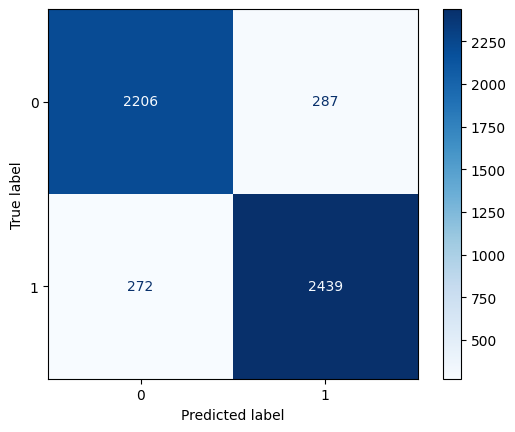

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(search_abc_robust, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

## Scaled and Pipelined Histogram-based Gradient Boosting

In [47]:
param_grid_hgb= {
   'hgb__learning_rate': [0.01, 0.1, 0.2],
   'hgb__max_depth': [3, 5, 7],
   'hgb__l2_regularization': [0, 0.1, 1]
}

p = pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('hgb', HistGradientBoostingClassifier(random_state=42)),
])

search_hgb = GridSearchCV(p, param_grid_hgb, n_jobs=8)
search_hgb.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('hgb',
                                        HistGradientBoostingClassifier(random_state=42))]),
             n_jobs=8,
             param_grid={'hgb__l2_regularization': [0, 0.1, 1],
                         'hgb__learning_rate': [0.01, 0.1, 0.2],
                         'hgb__max_depth': [3, 5, 7]})

In [48]:
test_report = classification_report(y_test, search_hgb.predict(X_test))
train_report = classification_report(y_train, search_hgb.predict(X_train))
print(f"Performance on TEST\n*******************\n{test_report}")
print(f"Performance on TRAIN\n********************\n{train_report}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2493
           1       0.92      0.91      0.91      2711

    accuracy                           0.91      5204
   macro avg       0.91      0.91      0.91      5204
weighted avg       0.91      0.91      0.91      5204

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5818
           1       0.96      0.96      0.96      6324

    accuracy                           0.96     12142
   macro avg       0.96      0.96      0.96     12142
weighted avg       0.96      0.96      0.96     12142



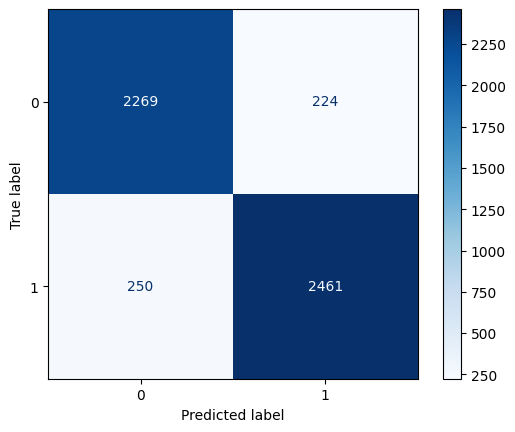

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(search_hgb, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)